In [2]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy.spatial.distance import cdist
from collections import defaultdict
import re

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi']=150


DATA = "PATH-TO-DATA"

def findNearestNeighborUsingTime(target_time, all_times, long_array):
    #long array is the one we want to find the nearest neighbor in
    time_diff = np.abs(all_times - target_time)
    nn_idx = np.argmin(time_diff)
    return nn_idx, long_array[nn_idx]


In [3]:
csv_files = [f for f in os.listdir(DATA) if f.endswith(".csv")]
print(csv_files)
print(len(csv_files))
print(csv_files)

# Function to extract timestamp from a filename
def extract_timestamp(filename):
    match = re.search(r'(\d{2}_\d{2}_\d{2}_\d{2})', filename)
    if match:
        return match.group()
    return None

file_names = csv_files

# Create a dictionary to group files by timestamp
file_groups = defaultdict(list)

# Group the files by timestamp
for file_name in file_names:
    timestamp = extract_timestamp(file_name)
    if timestamp:
        file_groups[timestamp].append(file_name)

# Print the grouped files
for timestamp, files in file_groups.items():
    print(f"Timestamp: {timestamp}")
    for file in files:
        print(f"  {file}")



['control_pressure_27_10_20_49.csv', 'control_pressure_27_10_20_56.csv', 'control_pressure_27_10_21_15.csv', 'pos_27_10_20_18.csv', 'pos_27_10_21_58.csv', 'actual_pressure_27_10_21_58.csv', 'actual_pressure_27_10_20_56.csv', 'pos_27_10_20_49.csv', 'actual_pressure_27_10_21_15.csv', 'control_pressure_27_10_21_58.csv', 'actual_pressure_27_10_20_18.csv', 'pos_27_10_21_43.csv', 'actual_pressure_27_10_20_49.csv', 'pos_27_10_20_56.csv', 'control_pressure_27_10_21_43.csv', 'pos_27_10_21_15.csv', 'actual_pressure_27_10_21_43.csv', 'control_pressure_27_10_20_18.csv']
18
['control_pressure_27_10_20_49.csv', 'control_pressure_27_10_20_56.csv', 'control_pressure_27_10_21_15.csv', 'pos_27_10_20_18.csv', 'pos_27_10_21_58.csv', 'actual_pressure_27_10_21_58.csv', 'actual_pressure_27_10_20_56.csv', 'pos_27_10_20_49.csv', 'actual_pressure_27_10_21_15.csv', 'control_pressure_27_10_21_58.csv', 'actual_pressure_27_10_20_18.csv', 'pos_27_10_21_43.csv', 'actual_pressure_27_10_20_49.csv', 'pos_27_10_20_56.csv

In [4]:
initials = []
for name in csv_files:
    if "pos" in name:
        df_position = pd.read_csv(os.path.join(DATA,name))
        x = df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"].max()
        y = df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y"].max()
        z = df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z"].max()

        initials.append([x,y,z])
print(df_position.shape)   
initials = np.array(initials)
print(np.max(initials, axis=0))
# plt.plot(initials[0])
print(initials)
# print(np.mean(initials, axis=0))
# plt.plot(initials[:,0])
# plt.plot(initials[:,1])
# plt.plot(initials[:,2])

(4647, 30)
[0.051645 0.359611 0.224479]
[[0.040916 0.356562 0.207217]
 [0.032527 0.35648  0.203253]
 [0.051645 0.359611 0.203168]
 [0.034274 0.354663 0.203243]
 [0.051452 0.35956  0.203258]
 [0.035009 0.358313 0.224479]]


In [4]:
print(file_groups.keys()) #byd efault 2Hz
print(len(file_groups))

dict_keys(['27_10_20_49', '27_10_20_56', '27_10_21_15', '27_10_20_18', '27_10_21_58', '27_10_21_43'])
6


In [7]:
# first_group = next(iter(file_groups.values()))

first_group = file_groups["27_10_20_18"]
print(first_group)

pos_idx = [index for index, element in enumerate(first_group) if "pos" in element][0]
control_idx = [index for index, element in enumerate(first_group) if "control" in element][0]
actual_idx = [index for index, element in enumerate(first_group) if "actual" in element][0]
print(pos_idx, control_idx, actual_idx)

df_controlP = pd.read_csv(os.path.join(DATA,first_group[control_idx]))
df_position = pd.read_csv(os.path.join(DATA,first_group[pos_idx]))
df_actualP = pd.read_csv(os.path.join(DATA,first_group[actual_idx]))
print(df_controlP.columns)

['pos_27_10_20_18.csv', 'actual_pressure_27_10_20_18.csv', 'control_pressure_27_10_20_18.csv']
0 2 1
Index(['__time', '/control_pressure/header/stamp', '/control_pressure/p_d.0',
       '/control_pressure/p_d.1', '/control_pressure/p_d.2'],
      dtype='object')


In [8]:
print(df_controlP.shape)
print(df_position.shape)
print(df_actualP.shape)

(31, 5)
(3138, 30)
(1569, 9)


In [6]:
start = np.array([0.0336805,0.352837,0.2021779])

0.0007355
differences x  -0.00673


Text(0.5, 1.0, 'z')

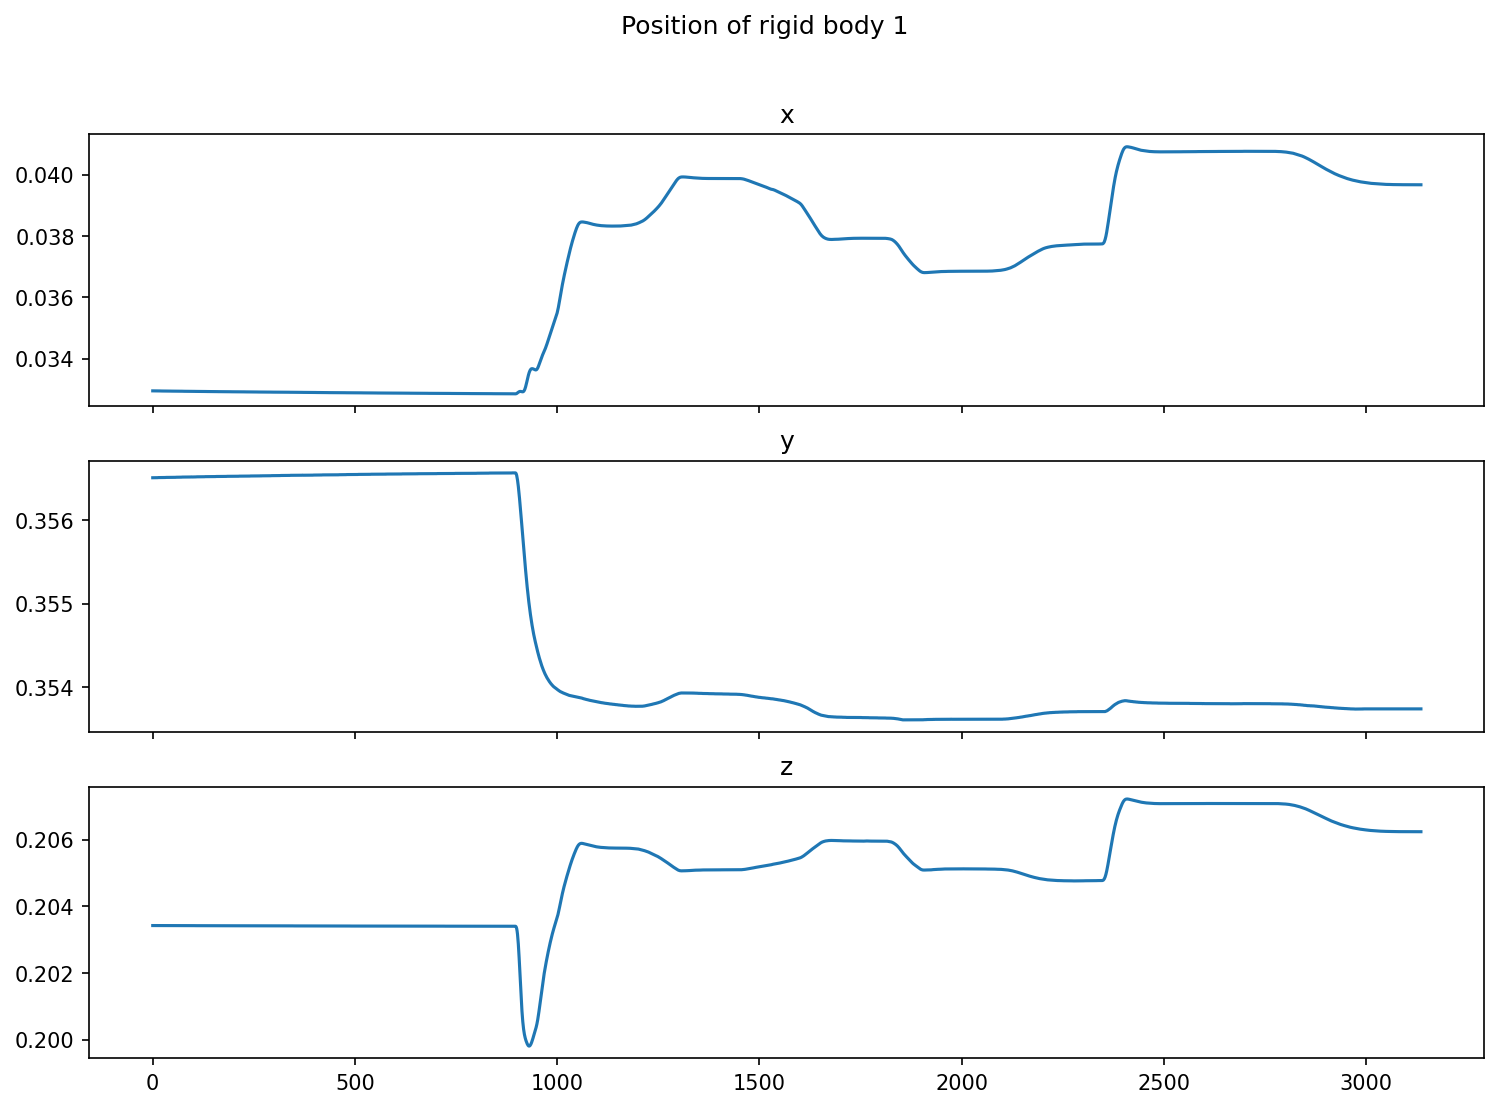

In [7]:
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
fig.suptitle('Position of rigid body 1')
diff = start[0] - df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"].iloc[0]
print(diff)
# print("differences x ",df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"][-1])
print("differences x ",df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"].iloc[0] - df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"].iloc[-1])
# print("differences y ",df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y"].iloc[0]+diff[1]- df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y"].iloc[-1])
# print("differences z ",df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z"].iloc[0]+diff[2]- df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z"].iloc[-1])

# df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"][0:256]
ax1.plot(df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"][0:-1])
ax1.set_title("x")

ax2.plot(df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y"][0:-1])
ax2.set_title("y")

ax3.plot(df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z"][0:-1])
ax3.set_title("z")




0.0007355
differences x  -0.00673


Text(0.5, 1.0, 'z')

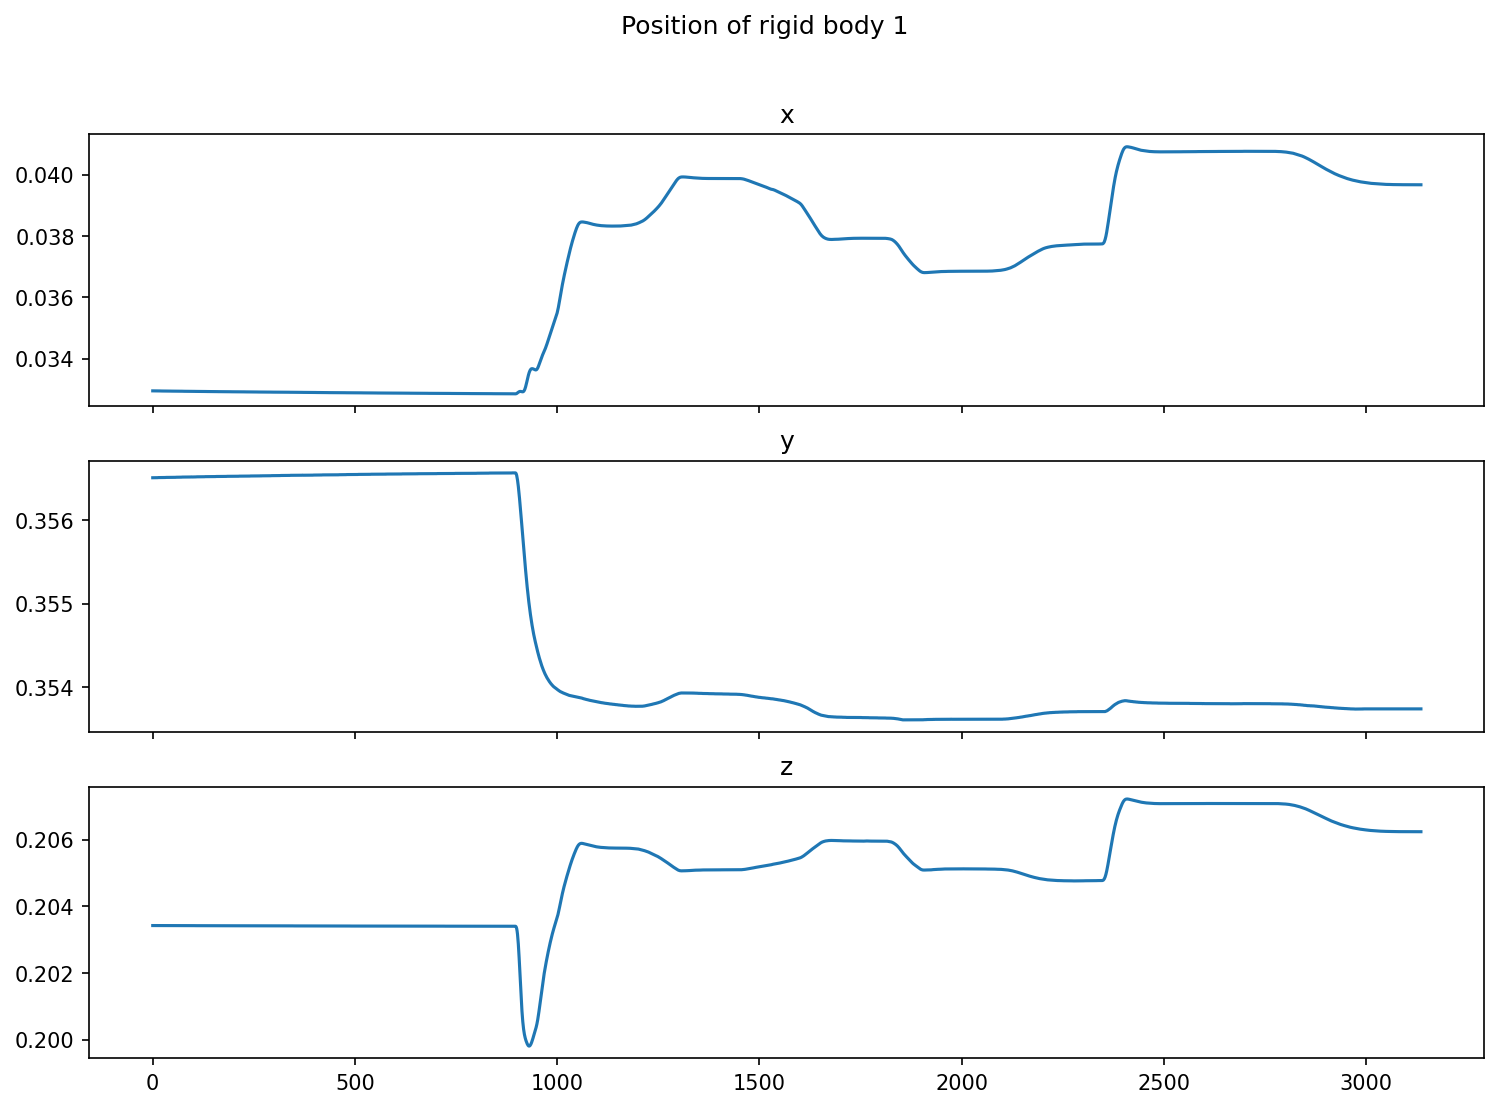

In [8]:
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
fig.suptitle('Position of rigid body 1')
diff = start[0] - df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"].iloc[0]
print(diff)
# print("differences x ",df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"][-1])
print("differences x ",df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"].iloc[0] - df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"].iloc[-1])
# print("differences y ",df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y"].iloc[0]+diff[1]- df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y"].iloc[-1])
# print("differences z ",df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z"].iloc[0]+diff[2]- df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z"].iloc[-1])

# df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"][0:256]
ax1.plot(df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"][0:-1])
ax1.set_title("x")

ax2.plot(df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y"][0:-1])
ax2.set_title("y")

ax3.plot(df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z"][0:-1])
ax3.set_title("z")




Text(0.5, 1.0, '3')

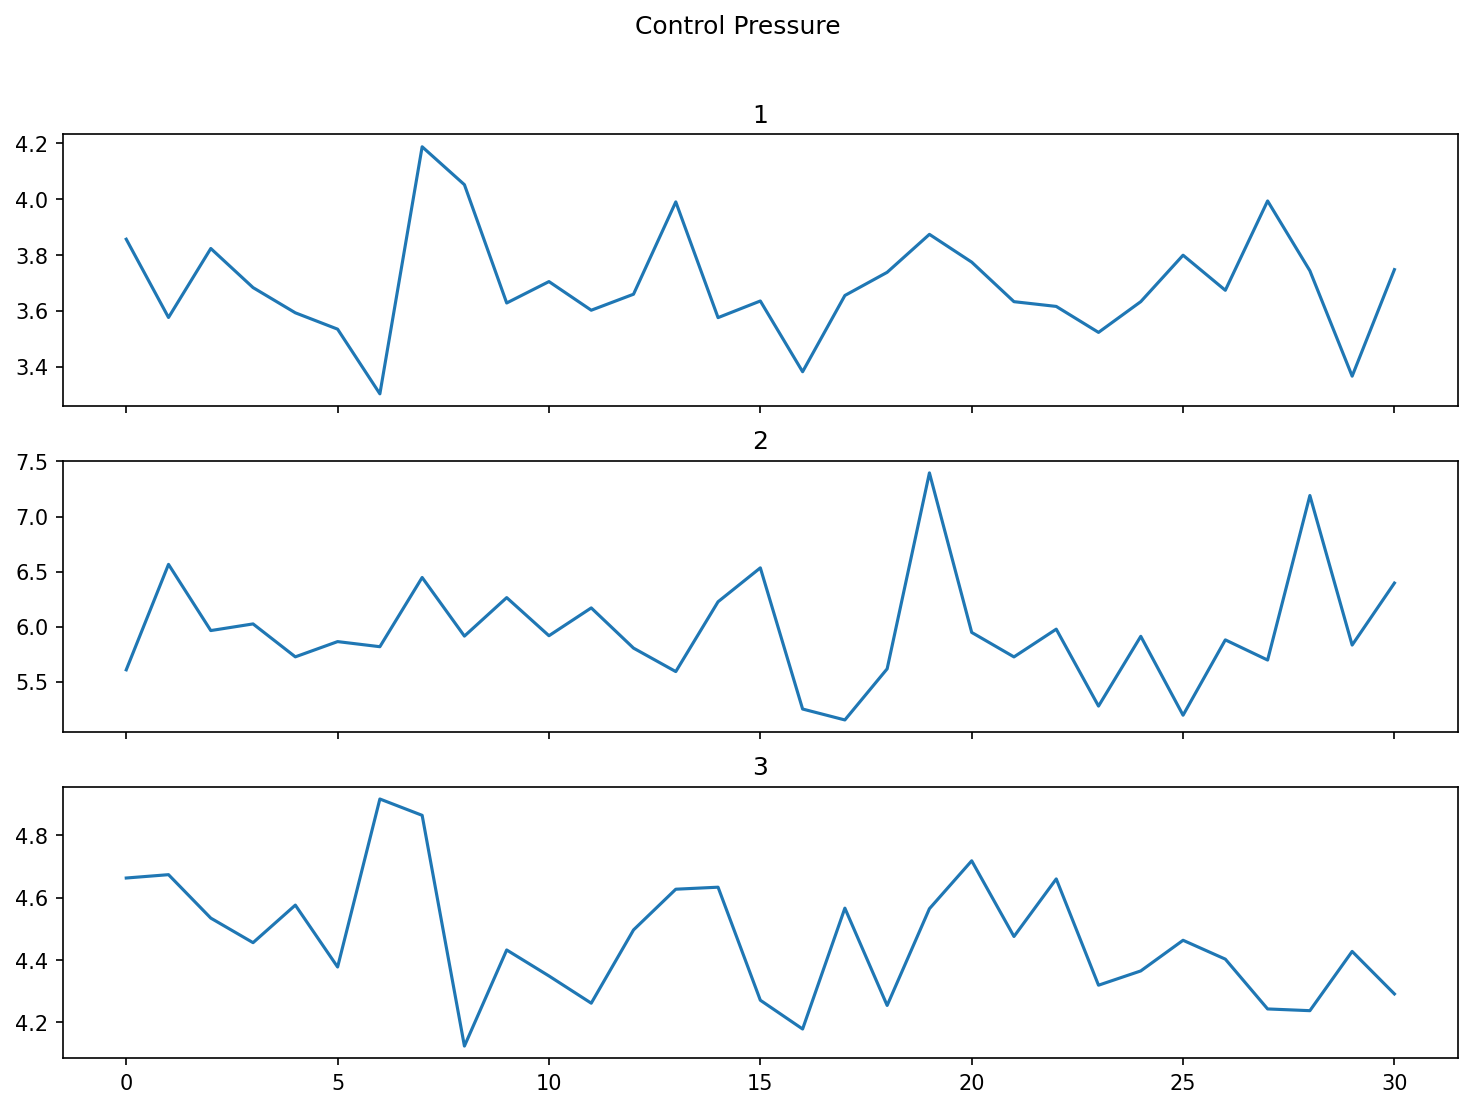

In [9]:
# Control Pressure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
fig.suptitle('Control Pressure')

# df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"][0:256]
ax1.plot(df_controlP["/control_pressure/p_d.0"])
ax1.set_title("1")

ax2.plot(df_controlP["/control_pressure/p_d.1"])
ax2.set_title("2")

ax3.plot(df_controlP["/control_pressure/p_d.2"])
ax3.set_title("3")

In [10]:
print(df_actualP["/actual_pressure/header/stamp"][0])
print(df_actualP["__time"][0])
print("Actual Pressure shape is ",df_actualP.shape)
print("\n")
print(df_position["__time"].to_list()[0])
print(df_position["/mocap_rigid_bodies/header/stamp"].to_list()[0])
print("Position shape is ",df_position.shape)
print("\n")
print(df_controlP["/control_pressure/header/stamp"][0])
print(df_controlP["__time"][0])
print("Control pressure shape is ", df_controlP.shape)


# cutoff_time = np.min([df_controlP["__time"][0],df_actualP["__time"][0],df_position["__time"][0]])
cutoff_time = df_controlP["__time"][0]

df_actualP.drop(df_actualP[df_actualP["/actual_pressure/header/stamp"] <= cutoff_time].index,inplace=True)
print("New Actual Pressure shape is ",df_actualP.shape)
df_actualP.reset_index(drop=True, inplace=True)

df_position.drop(df_position[df_position["/mocap_rigid_bodies/header/stamp"] <= cutoff_time].index,inplace=True)
print("New Position shape is ",df_position.shape)
df_position.reset_index(drop=True, inplace=True)

print(" control pressure shape is ",df_controlP.shape)

1698434145.197084
1698434145.198146
Actual Pressure shape is  (1569, 9)


1698434145.199698
1698434145.19899
Position shape is  (3138, 30)


0.0
1698434154.596036
Control pressure shape is  (31, 5)
New Actual Pressure shape is  (1099, 9)
New Position shape is  (2198, 30)
 control pressure shape is  (31, 5)


In [11]:
positions = df_position["/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x"].to_list()
df_position["match_flag"] = np.zeros(len(positions))
df_position["control_pressure_0"] = np.negative(np.ones(len(positions)))
df_position["control_pressure_1"] = np.negative(np.ones(len(positions)))
df_position["control_pressure_2"] = np.negative(np.ones(len(positions)))

df_position.head(5)

,__time,/mocap_rigid_bodies/header/stamp,/mocap_rigid_bodies/rigid_bodies.0/header/stamp/nanosec,/mocap_rigid_bodies/rigid_bodies.0/header/stamp/sec,/mocap_rigid_bodies/rigid_bodies.0/id,/mocap_rigid_bodies/rigid_bodies.0/mean_error,/mocap_rigid_bodies/rigid_bodies.0/pose_stamped/header/stamp/nanosec,/mocap_rigid_bodies/rigid_bodies.0/pose_stamped/header/stamp/sec,/mocap_rigid_bodies/rigid_bodies.0/pose_stamped/pose/orientation/w,/mocap_rigid_bodies/rigid_bodies.0/pose_stamped/pose/orientation/x,...,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/orientation/y,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/orientation/z,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z,/mocap_rigid_bodies/rigid_bodies.1/valid,match_flag,control_pressure_0,control_pressure_1,control_pressure_2
0,1.698434e+09,1.698434e+09,597919488.0,1.698434e+09,3.0,0.000266,597919488.0,1.698434e+09,-1.0,0.000252,...,0.000376,-0.011795,0.033666,0.354687,0.200031,1.0,0.0,-1.0,-1.0,-1.0
1,1.698434e+09,1.698434e+09,608057856.0,1.698434e+09,3.0,0.000265,608057856.0,1.698434e+09,-1.0,0.000251,...,0.000369,-0.011803,0.033661,0.354660,0.200072,1.0,0.0,-1.0,-1.0,-1.0
2,1.698434e+09,1.698434e+09,617920768.0,1.698434e+09,3.0,0.000265,617920768.0,1.698434e+09,-1.0,0.000249,...,0.000359,-0.011790,0.033655,0.354635,0.200112,1.0,0.0,-1.0,-1.0,-1.0
3,1.698434e+09,1.698434e+09,628279040.0,1.698434e+09,3.0,0.000265,628279040.0,1.698434e+09,-1.0,0.000248,...,0.000353,-0.011761,0.033649,0.354611,0.200153,1.0,0.0,-1.0,-1.0,-1.0
4,1.698434e+09,1.698434e+09,640871680.0,1.698434e+09,3.0,0.000265,640871680.0,1.698434e+09,-1.0,0.000247,...,0.000347,-0.011722,0.033642,0.354588,0.200194,1.0,0.0,-1.0,-1.0,-1.0


In [12]:
for pressure_idx, ts in zip(range(df_controlP.shape[0]),df_controlP["__time"]):
    idx, val = findNearestNeighborUsingTime(ts,df_position["__time"],positions)
    df_position["match_flag"][idx] = 1
    df_position["control_pressure_0"][idx] = df_controlP["/control_pressure/p_d.0"][pressure_idx]
    df_position["control_pressure_1"][idx] = df_controlP["/control_pressure/p_d.1"][pressure_idx]
    df_position["control_pressure_2"][idx] = df_controlP["/control_pressure/p_d.2"][pressure_idx]

df_position.head(5) 

,__time,/mocap_rigid_bodies/header/stamp,/mocap_rigid_bodies/rigid_bodies.0/header/stamp/nanosec,/mocap_rigid_bodies/rigid_bodies.0/header/stamp/sec,/mocap_rigid_bodies/rigid_bodies.0/id,/mocap_rigid_bodies/rigid_bodies.0/mean_error,/mocap_rigid_bodies/rigid_bodies.0/pose_stamped/header/stamp/nanosec,/mocap_rigid_bodies/rigid_bodies.0/pose_stamped/header/stamp/sec,/mocap_rigid_bodies/rigid_bodies.0/pose_stamped/pose/orientation/w,/mocap_rigid_bodies/rigid_bodies.0/pose_stamped/pose/orientation/x,...,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/orientation/y,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/orientation/z,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y,/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z,/mocap_rigid_bodies/rigid_bodies.1/valid,match_flag,control_pressure_0,control_pressure_1,control_pressure_2
0,1.698434e+09,1.698434e+09,597919488.0,1.698434e+09,3.0,0.000266,597919488.0,1.698434e+09,-1.0,0.000252,...,0.000376,-0.011795,0.033666,0.354687,0.200031,1.0,1.0,3.856429,5.609617,4.662673
1,1.698434e+09,1.698434e+09,608057856.0,1.698434e+09,3.0,0.000265,608057856.0,1.698434e+09,-1.0,0.000251,...,0.000369,-0.011803,0.033661,0.354660,0.200072,1.0,0.0,-1.000000,-1.000000,-1.000000
2,1.698434e+09,1.698434e+09,617920768.0,1.698434e+09,3.0,0.000265,617920768.0,1.698434e+09,-1.0,0.000249,...,0.000359,-0.011790,0.033655,0.354635,0.200112,1.0,0.0,-1.000000,-1.000000,-1.000000
3,1.698434e+09,1.698434e+09,628279040.0,1.698434e+09,3.0,0.000265,628279040.0,1.698434e+09,-1.0,0.000248,...,0.000353,-0.011761,0.033649,0.354611,0.200153,1.0,0.0,-1.000000,-1.000000,-1.000000
4,1.698434e+09,1.698434e+09,640871680.0,1.698434e+09,3.0,0.000265,640871680.0,1.698434e+09,-1.0,0.000247,...,0.000347,-0.011722,0.033642,0.354588,0.200194,1.0,0.0,-1.000000,-1.000000,-1.000000


31.0
0.014103730664240218


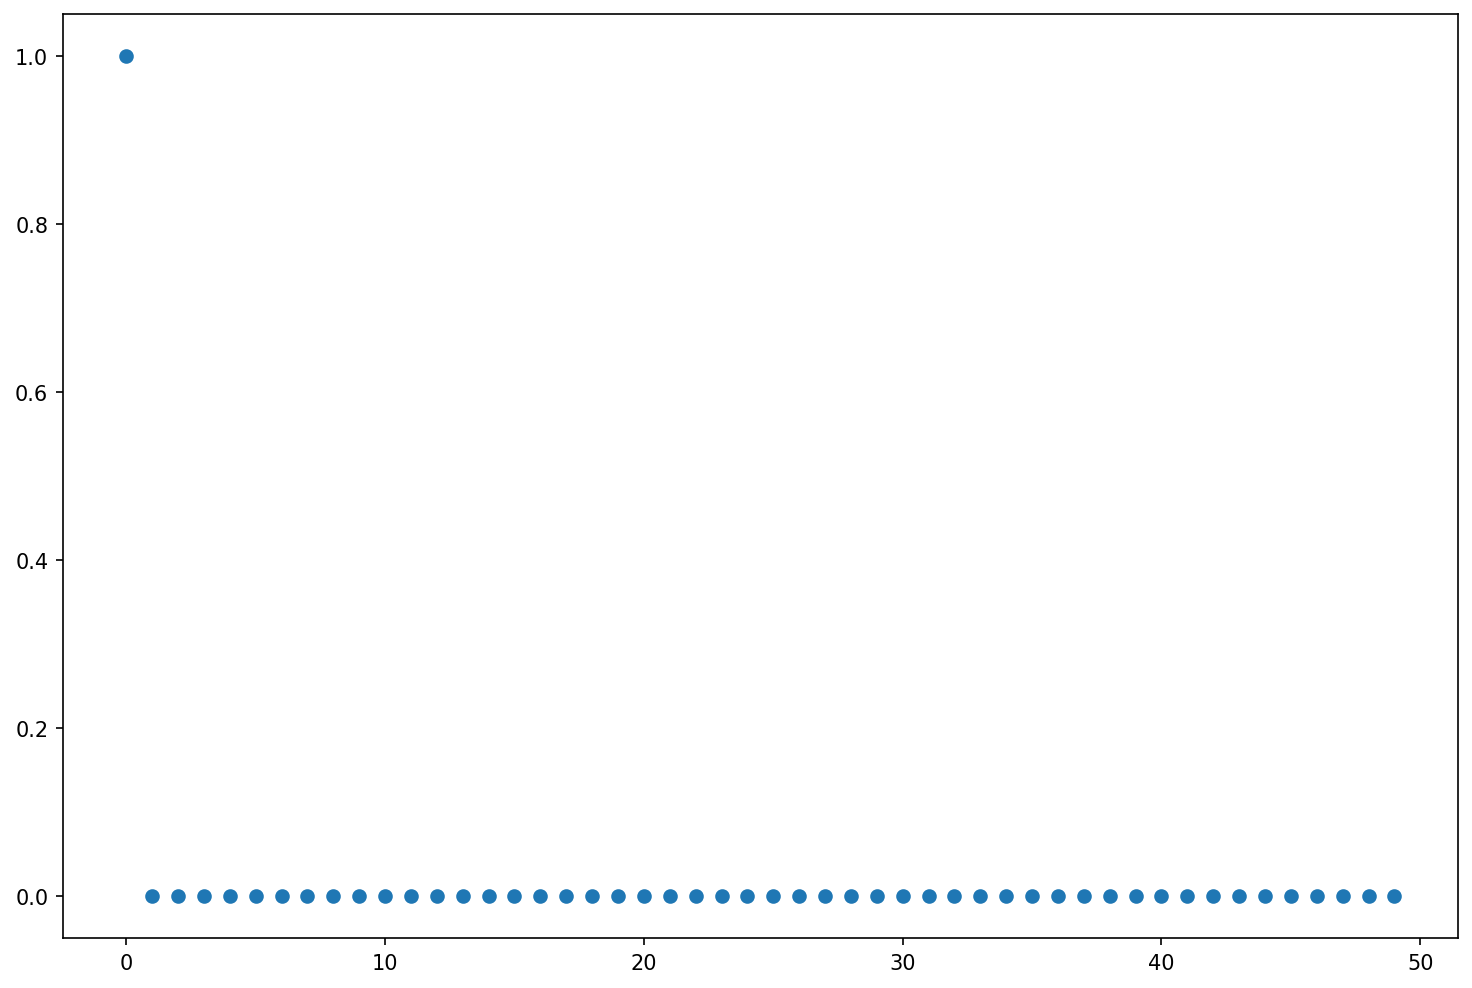

In [13]:
print(df_position["match_flag"].sum())
period = df_position["match_flag"].sum()/df_position.shape[0]
print(period)
plt.plot(df_position["match_flag"][0:50],"o")

In [14]:
df_position.columns
df_total = df_position[['__time','/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x',
                        '/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y',
                        '/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z',
                        'control_pressure_0','control_pressure_1','control_pressure_2']]
df_total.rename(columns = {
    '/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/x':'1_x',
    "/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/y":"1_y",
    "/mocap_rigid_bodies/rigid_bodies.1/pose_stamped/pose/position/z":"1_z",
    "__time":"time"
}, inplace=True)

df_total.head(5)

/tmp/ipykernel_29201/2923121533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.rename(columns = {


,time,1_x,1_y,1_z,control_pressure_0,control_pressure_1,control_pressure_2
0,1.698434e+09,0.033666,0.354687,0.200031,3.856429,5.609617,4.662673
1,1.698434e+09,0.033661,0.354660,0.200072,-1.000000,-1.000000,-1.000000
2,1.698434e+09,0.033655,0.354635,0.200112,-1.000000,-1.000000,-1.000000
3,1.698434e+09,0.033649,0.354611,0.200153,-1.000000,-1.000000,-1.000000
4,1.698434e+09,0.033642,0.354588,0.200194,-1.000000,-1.000000,-1.000000


In [15]:
df_total.loc[:,"control_pressure_0"] = df_total.loc[:,"control_pressure_0"].replace(-1,np.nan).fillna(method='ffill')
df_total.loc[:,"control_pressure_1"] = df_total.loc[:,"control_pressure_1"].replace(-1,np.nan).fillna(method='ffill')
df_total.loc[:,"control_pressure_2"] = df_total.loc[:,"control_pressure_2"].replace(-1,np.nan).fillna(method='ffill')
df_total.head(5)

,time,1_x,1_y,1_z,control_pressure_0,control_pressure_1,control_pressure_2
0,1.698434e+09,0.033666,0.354687,0.200031,3.856429,5.609617,4.662673
1,1.698434e+09,0.033661,0.354660,0.200072,3.856429,5.609617,4.662673
2,1.698434e+09,0.033655,0.354635,0.200112,3.856429,5.609617,4.662673
3,1.698434e+09,0.033649,0.354611,0.200153,3.856429,5.609617,4.662673
4,1.698434e+09,0.033642,0.354588,0.200194,3.856429,5.609617,4.662673


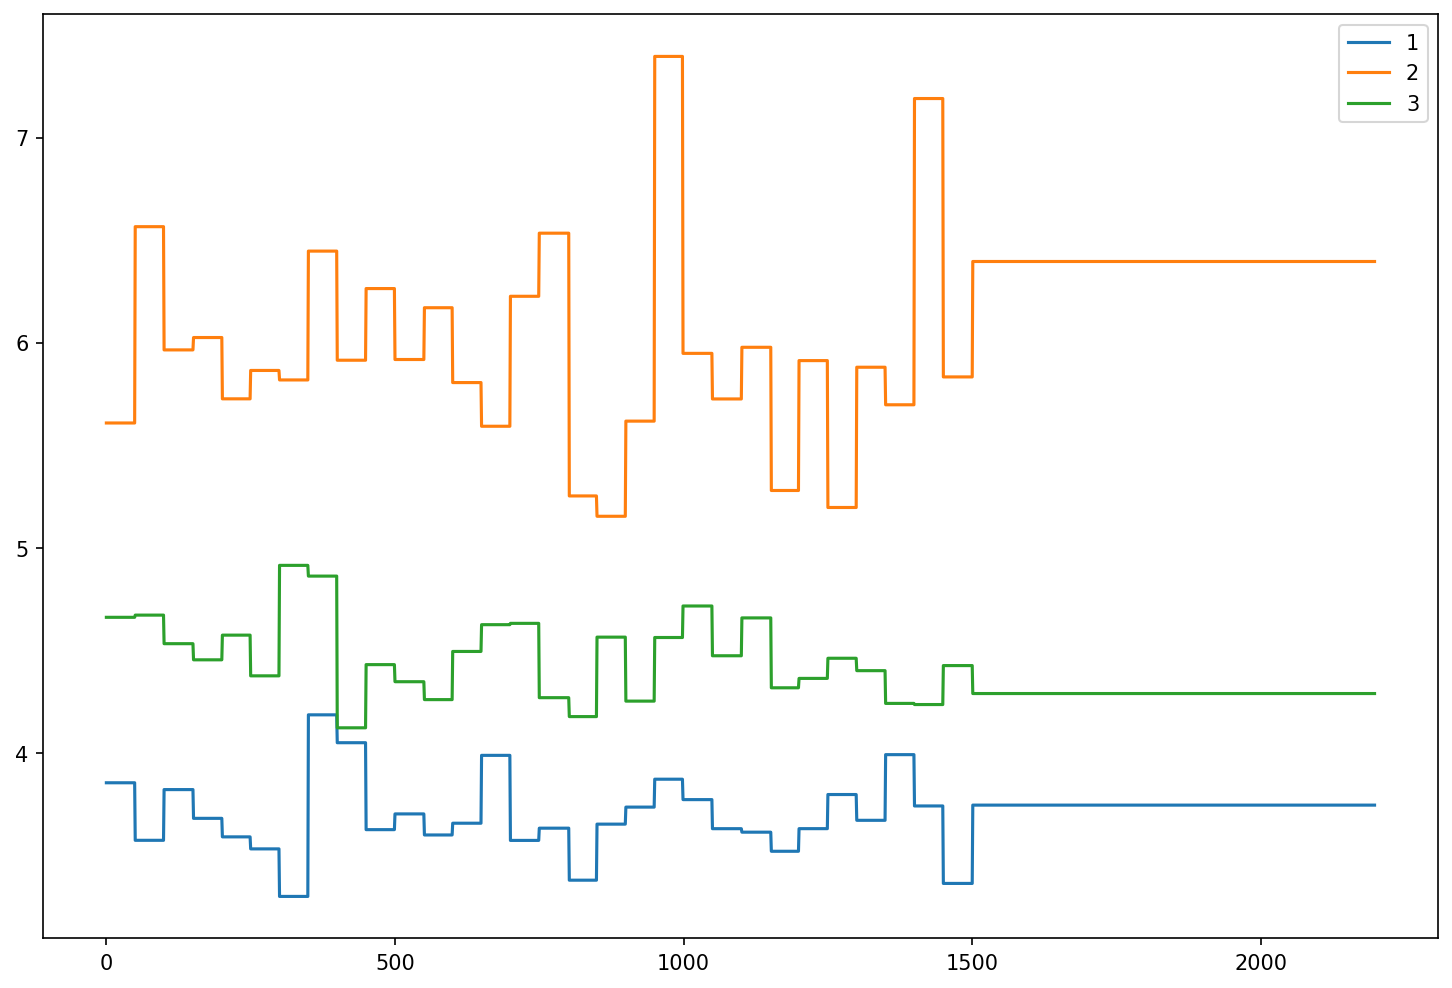

In [16]:
plt.plot(df_total["control_pressure_0"][0:10000],label="1")
plt.plot(df_total["control_pressure_1"][0:10000],label="2")
plt.plot(df_total["control_pressure_2"][0:10000],label="3")
plt.legend()

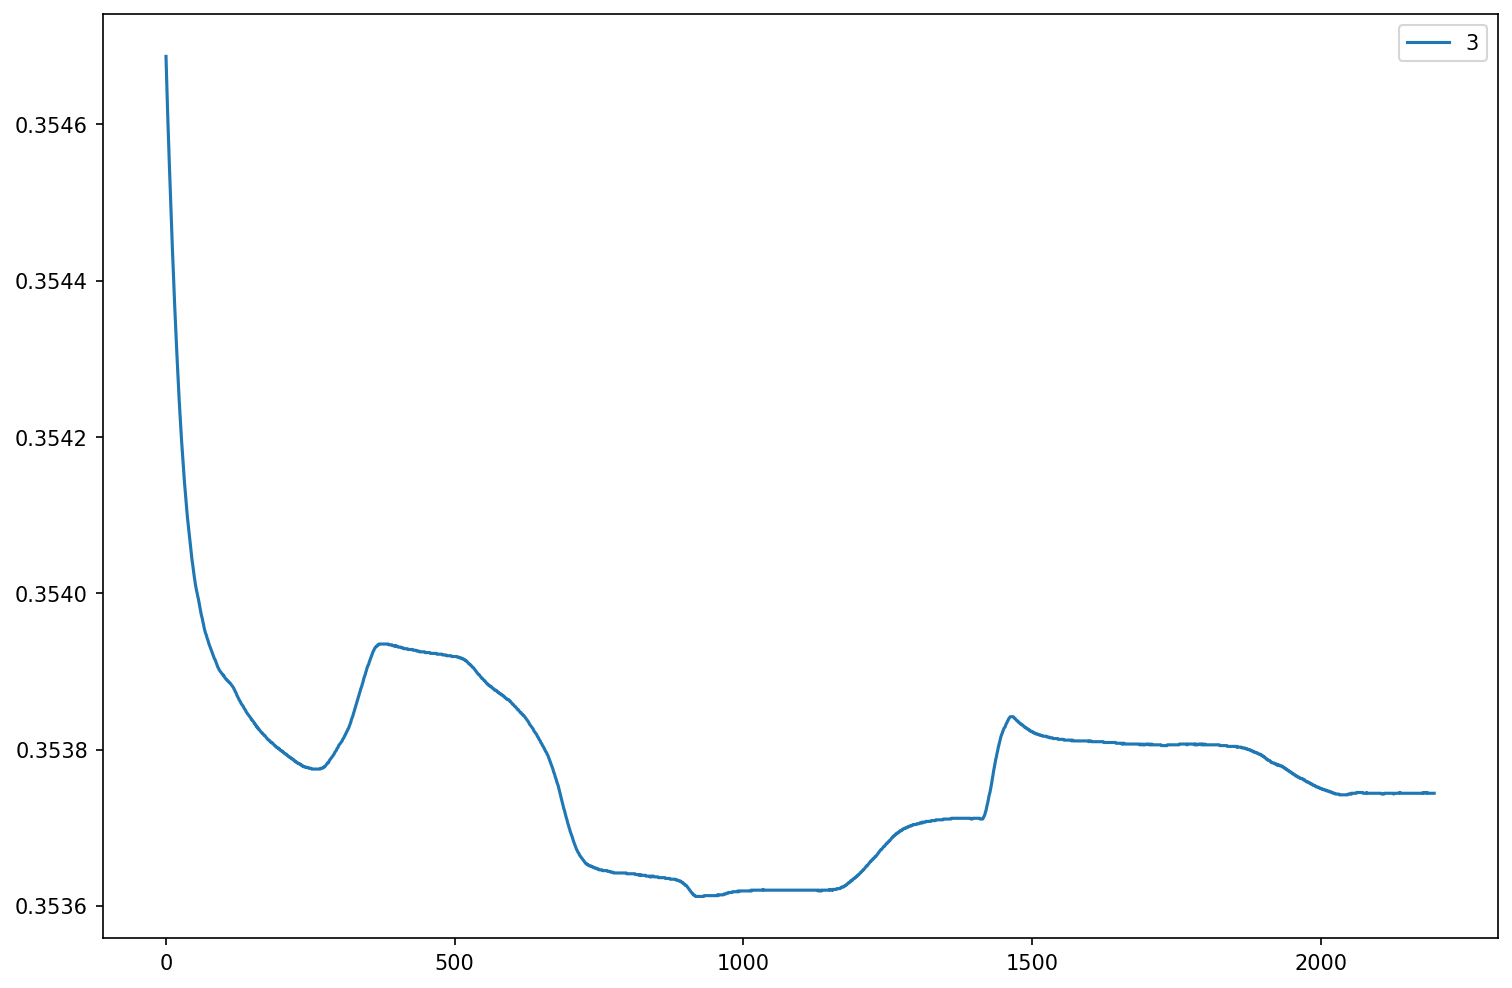

In [17]:
# plt.plot(df_total["1_x"][0:-1],label="1")
# plt.plot(df_total["1_z"][0:-1],label="2")
plt.plot(df_total["1_y"][0:-1],label="3")
plt.legend()

In [18]:
print("Step_control_"+"_".join(first_group[pos_idx].split("_")[1:]))

Step_control_27_10_20_18.csv


In [19]:
# csv_name = "Step_control_"+"_".join(first_group[0].split("_")[2:])
# print(csv_name)
# print(csv_name[-4:len(csv_name)])
CSV_NAME = os.path.join("/home/uljad/SoftControlRL/lstm_random_inputs/data/sigmoid/","Step_control_"+"_".join(first_group[pos_idx].split("_")[1:]))
df_total.to_csv(os.path.join(DATA,CSV_NAME),index=False)


In [20]:
positions = np.load("../envs/observations/distance0.005172413793103448.npy")

In [26]:
import plotly.graph_objects as go
import numpy as np

def plot_3d_arrays(sim_array, real_array):
    # Check if arrays have the correct shape
    if sim_array.shape[1] != 3 or real_array.shape[1] != 3:
        raise ValueError("Both input arrays should have shape N x 3")

    # Define a function to generate a color scale
    def generate_color_scale(length, base_rgb, intensity_start=0.01, intensity_end=1.0):
        return [
            (
                base_rgb[0] + int((255 - base_rgb[0]) * (intensity_start + (intensity_end - intensity_start) * (i/length))),
                base_rgb[1] + int((255 - base_rgb[1]) * (intensity_start + (intensity_end - intensity_start) * (i/length))),
                base_rgb[2] + int((255 - base_rgb[2]) * (intensity_start + (intensity_end - intensity_start) * (i/length)))
            ) 
            for i in range(length)
        ]

    sim_colors = generate_color_scale(sim_array.shape[0], base_rgb=(255, 0, 0))
    real_colors = generate_color_scale(real_array.shape[0], base_rgb=(0, 0, 255))

    # Convert RGB tuples to 'rgba' format for Plotly
    sim_colors = [f'rgba({r},{g},{b}, 0.8)' for r, g, b in sim_colors]
    real_colors = [f'rgba({r},{g},{b}, 0.8)' for r, g, b in real_colors]

    # Create a scatter plot for the simulated array
    trace_sim = go.Scatter3d(
        x=sim_array[:, 0],
        y=sim_array[:, 1],
        z=sim_array[:, 2],
        mode='markers',
        marker=dict(size=5, color=sim_colors, opacity=0.8),
        name='Simulated'
    )

    # Create a scatter plot for the real array
    trace_real = go.Scatter3d(
        x=real_array[:, 0],
        y=real_array[:, 1],
        z=real_array[:, 2],
        mode='markers',
        marker=dict(size=5, color=real_colors, opacity=0.8),
        name='Real'
    )

    # Define the layout
    layout = go.Layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='Z')
        )
    )

    # Combine traces and plot
    fig = go.Figure(data=[trace_sim, trace_real], layout=layout)
    fig.show()

# print(positions[0])
real_array = np.column_stack((x,y,z))
sim_diff = positions[0] - real_array[0]
print(real_array.shape)
real_array = real_array - sim_diff
print(sim_diff)
sim_array = positions
print(real_array[-1,0]-sim_array[-1,0])
plot_3d_arrays(sim_array, real_array)


(1, 3)
[-0.0013285 -0.005476  -0.0223011]
-0.00047797054719925236


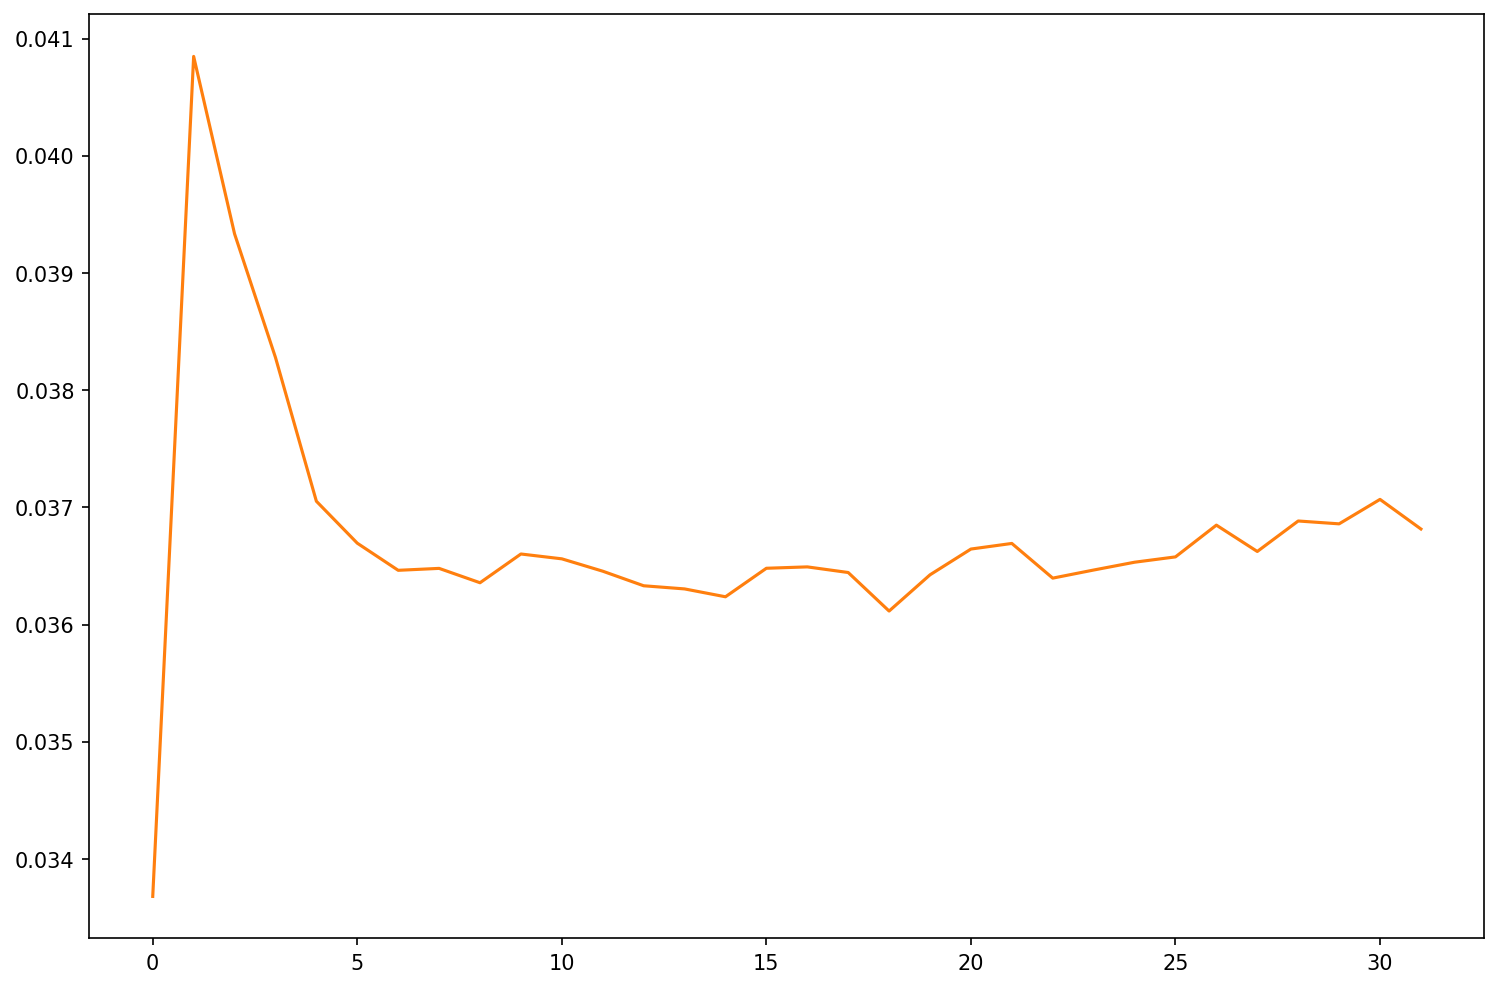

In [649]:
plt.plot(real_array[:,0],label="real")
plt.plot(sim_array[:,0],label="sim")